In [3]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt 

# Histogram

A histogram counts the number of occurance of the intensity values of pixels, This is useful for understanding and manipulating images.
To generate the histogram we use this 
<code>cv.calcHist()</code>


<code>cv2.calcHist(CV array:<b>[image]</b> this is the image channel:<b>[0]</b>,for this course it will always be <b>[None]</b>,the number of bins:<b>[L]</b>,the range of index of bins:<b>[0,L-1]</b>) </code> 

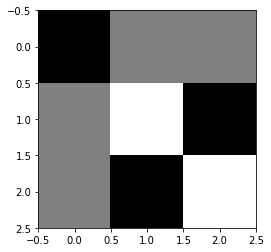

[[0 1 1]
 [1 2 0]
 [1 0 2]]


In [4]:
box = np.array ([[0,1,1],[1,2,0],[1,0,2]], dtype=np.uint8)
plt.imshow(box, cmap='gray')
plt.show()
print(box)



We look at the area where the value is 2. the intensity is higher.

In [5]:
temp_hist= cv2.calcHist([box],[0],None,[3],[0,3])
print(temp_hist)

[[3.]
 [4.]
 [2.]]


Above we can see the <code>0</code> has occured only at single place. <code>1</code>and <code>4</code> occured at 4 times.

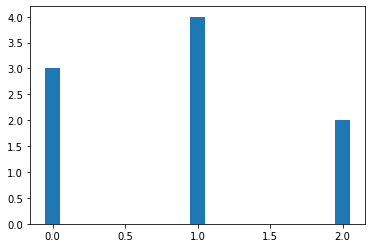

In [6]:
temp_intensity_values = np.array([x for x in range(temp_hist.shape[0])])
plt.bar(temp_intensity_values,temp_hist[:,0],width=0.1)
plt.show()

# Gray scale histogram

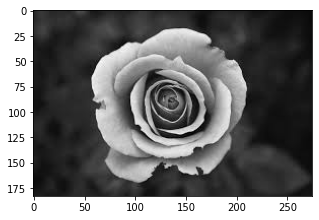

In [7]:
temp_image= cv2.imread("rose.jpg")
temp_image= cv2.cvtColor(temp_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(temp_image)
plt.show()

 getting the values of the intensity of the image

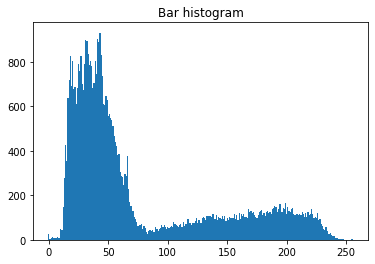

In [8]:
hist= cv2.calcHist([temp_image],[0],None,[256],[0,256])

intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 1)
plt.title("Bar histogram")
plt.show()

So, histogram is a function $ h\ [r] $ where $r \in {0,1,...,255}$

We can convert it to a probability mass function by normalizing it by the number of pixels:

In [9]:
PMF= hist/ (temp_image.shape[0] * temp_image.shape[1])

Plotting as a continious function

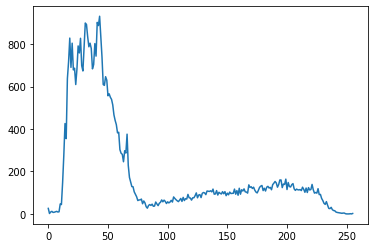

In [10]:
plt.plot(intensity_values,hist)
plt.show()

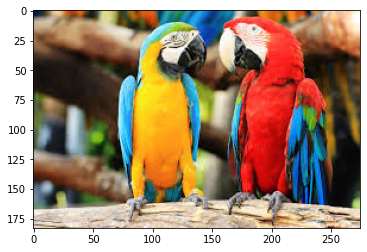

In [11]:
parrot= cv2.imread('parrot.jpg')
parrot= cv2.cvtColor(parrot, cv2.COLOR_BGR2RGB)
plt.imshow(parrot)
plt.show()

plotting the different color channel 

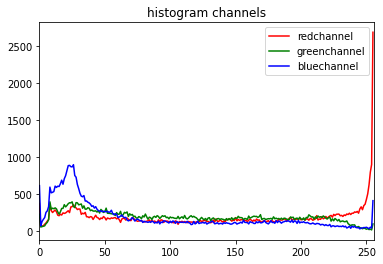

In [12]:
color = ('red','green','blue')

for i,clr in enumerate(color):
    hist_p= cv2.calcHist([parrot],[i],None,[256],[0,256])
    plt.plot(intensity_values,hist_p, color = clr, label = clr + 'channel')
    plt.xlim([0,256])
plt.legend()
plt.title("histogram channels")
plt.show()

# Intensity Transformation

suppose the image is a functiono $f(x,y)$ and we are tranforming say into $g(x,y)$ 

$g(x,y) = T(f(x,y)) $ where, $T(x)= 2x +1$, 

here, $ T(x) $ is function of transformation, it can be linear, logarithmic,or any other.


so basically we are multiplying each of the pixcels intensity by 2 and adding 1 to it.

# Image Negatives

considering an image of L intensity values.(most of the images we take we consider it of the size of 256). now, we can reverse its intensity level by following formula:
$g(x,y)= L-1-f(x,y)$

if L=256,

$g(x,y) = 255 -f(x,y)$

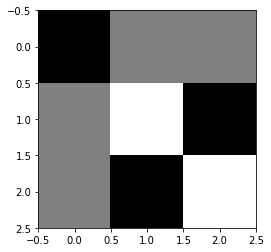

In [13]:
plt.imshow(box, cmap= 'gray')
plt.show()

In [14]:
neg_box_image= -1 * box + 255 # negative_image formula
print("original_box image\n", box)
print("negative_box image\n", neg_box_image)

original_box image
 [[0 1 1]
 [1 2 0]
 [1 0 2]]
negative_box image
 [[255 254 254]
 [254 253 255]
 [254 255 253]]


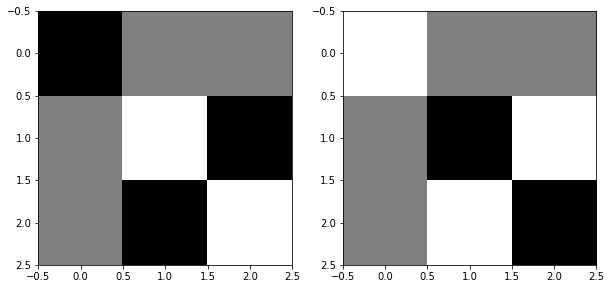

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)

plt.imshow(box, cmap='gray')
plt.subplot(1,2,2)

plt.imshow(neg_box_image, cmap='gray')
plt.show()

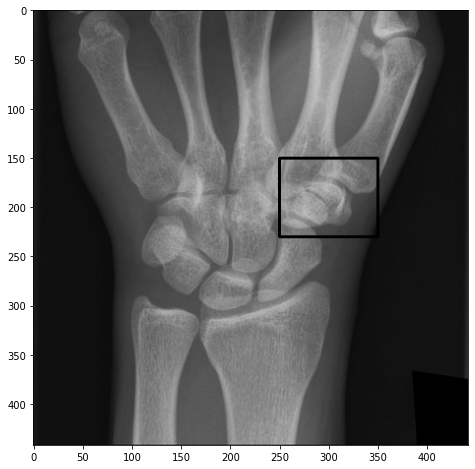

In [16]:
xray= cv2.imread('xray.jpeg')
cv2.rectangle(xray, pt1= (250,150), pt2=(350,230),color=(0,0,0),thickness=2)
plt.figure(figsize=(8,8))
plt.imshow(xray)
plt.show()

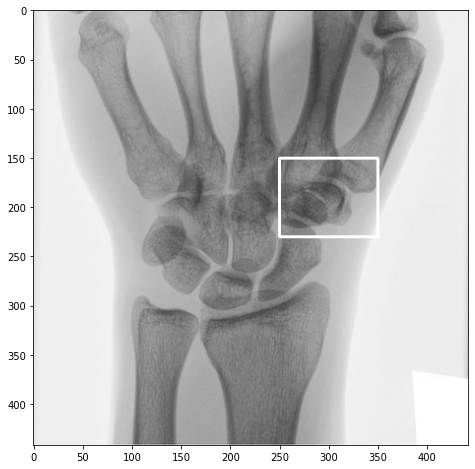

In [17]:
xray_neg= -1 * xray + 255
plt.figure(figsize=(8,8))
plt.imshow(xray_neg)
plt.show()

# Brightness and Contrast 

$ \alpha $ = contrast control and $ \beta $= brightness, 
Now, we are transforming a function of $f(x,y) $ to function $g(x,y)$ while improving its brightness and contrast.

then tranformed image $g(x,y)$, where $g(x,y) = \alpha f(x,y) + \beta$.


In [18]:
a,b = 1,100
new_image =cv2.convertScaleAbs(temp_image, alpha = a, beta =b)

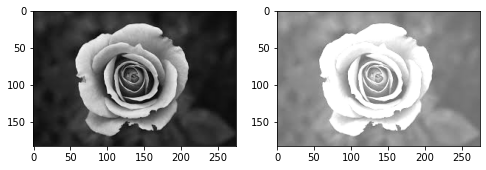

In [19]:

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(temp_image)
plt.subplot(1,2,2)
plt.imshow(new_image)
plt.show()

# Histogram Equalization
it increases the contrast of images, by stretching out the range of the grayscale pixels; 
it does by flatting the histogram. we simply apply the funtion <code>cv2.equalizeHist</code>

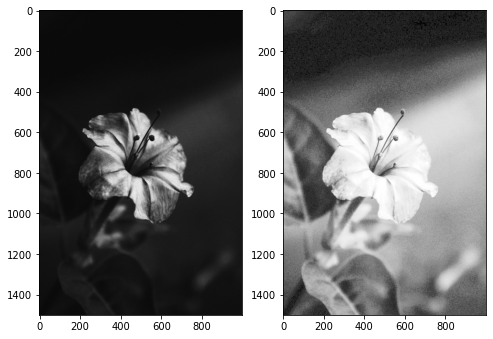

In [20]:
flower= cv2.imread('flower.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(flower, cmap='gray')

flower_new= cv2.equalizeHist(flower)
plt.subplot(1,2,2)
plt.imshow(flower_new, cmap='gray')
plt.show()

In [21]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

# Thresholding and segmentation
in this process we see it the particular pixel is greater than the threshold value we assign it to the max_vale otherwise to the min_value.

In [57]:
# Thresholding and simple segmentation

def thresholding(input_img, threshold,max_value=255, min_value=0,):
    n= input_img.shape[0]
    m= input_img.shape[1]
    # n,m= input_img.shape
    
    image_out= np.zeros((n,m), dtype=np.uint8)
    
    for i in range(n):
        for j in range(m):
            if input_img[i,j] > threshold:
                image_out[i,j] = max_value
            else:
                image_out[i,j] = min_value
    return image_out

    

In [58]:
print(box)

[[0 1 1]
 [1 2 0]
 [1 0 2]]


In [59]:
threshold=1
max_value =2
min_value =0

thresholding_box= thresholding(box,threshold=threshold,max_value=max_value,min_value=min_value)
thresholding_box

array([[0, 0, 0],
       [0, 2, 0],
       [0, 0, 2]], dtype=uint8)

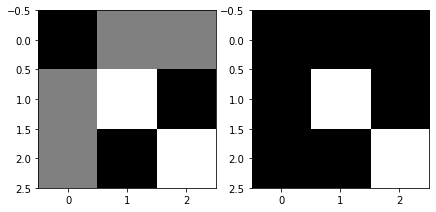

In [60]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(box, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(thresholding_box, cmap= 'gray')

plt.show()

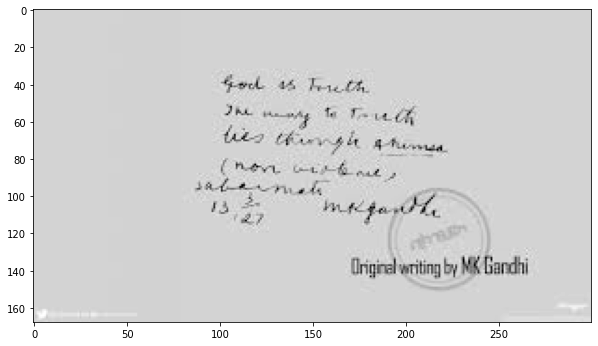

In [64]:
text= cv2.imread("text.jpg",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(text, cmap='gray')
plt.show()

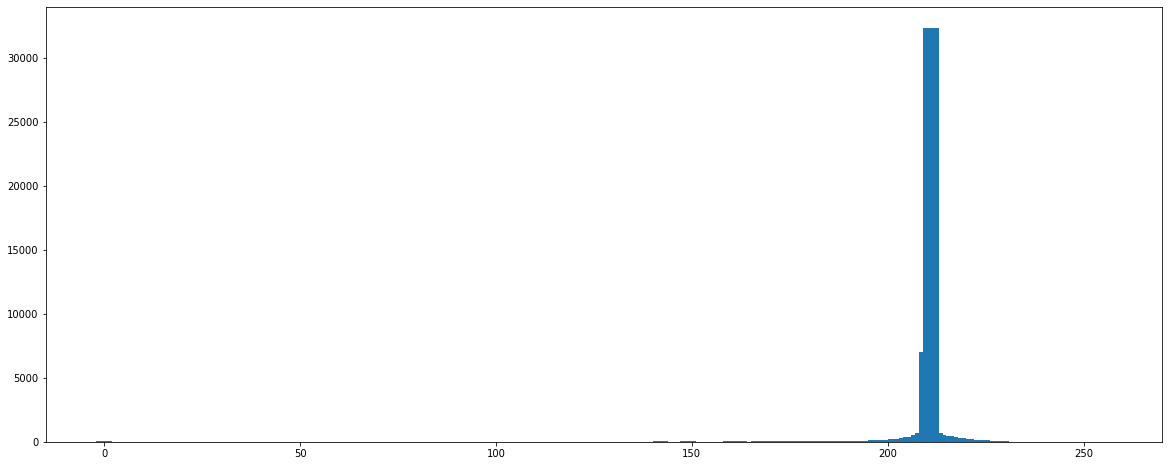

In [96]:
hist = cv2.calcHist([text],[0], None, [256],[0,256])
plt.figure(figsize=(20,8))
plt.bar(intensity_values, hist[:,0], width=4)
plt.show()


In [118]:
t=200
max=255
min=0
new_image= thresholding(text, threshold= t, max_value=max,min_value=min)

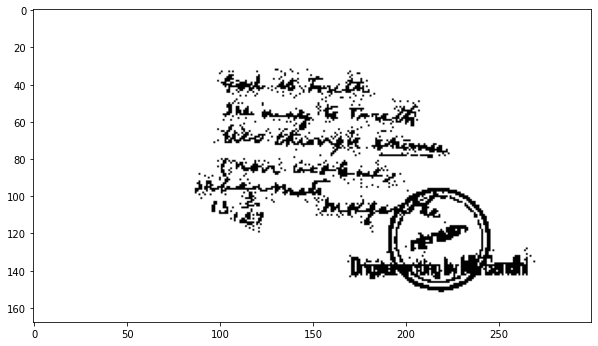

In [119]:
plt.figure(figsize=(10,10))
plt.imshow(new_image, cmap='gray')
plt.show()

# improving the threshold

providing the upper and lower value to the threshold we can inhance the results which we obtained previously

In [ ]:

def thresholding2(input_img, thresholdup, thresholddown,max_value=255, min_value=0,):
    n= input_img.shape[0]
    m= input_img.shape[1]
    # n,m= input_img.shape
    
    image_out= np.zeros((n,m), dtype=np.uint8)
    
    for i in range(n):
        for j in range(m):
            if input_img[i,j] > thresholddown and input_img[i,j] < thresholdup:
                image_out[i,j] = max_value
            else:
                image_out[i,j] = min_value
    return image_out

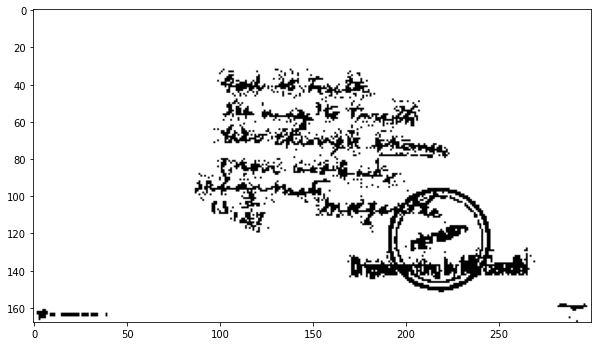

In [131]:
tdown=200
tup=225
max=255
min=0
new_image2= thresholding2(text, thresholdup= tup,thresholddown=tdown, max_value=max,min_value=min)
plt.figure(figsize=(10,10))
plt.imshow(new_image2, cmap='gray')
plt.show()